<a href="https://colab.research.google.com/github/Rogerio-mack/ProjetoAplicadoIV/blob/main/FB3_energisa_entrega_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  <img src="https://github.com/Rogerio-mack/GCF/raw/main/GCF_files/Mackenzie.jpg" width="25%" align="right"/>

  # **PROJETO APLICADO IV - Entrega 3**

# **Detecção de anomalias em série temporal multivariada envolvendo atendimento ao consumidor Energisa Mato Grosso**
---

In [ ]:
#@title **Identificação do Grupo e Opção do Projeto**

#@markdown Integrantes do Grupo:
Aluno1 = 'Amanda Noronha Cohen, 10037290' #@param {type:"string"}
Aluno2 = 'Kelly Cristina da Silva Pascoalino, 10369673' #@param {type:"string"}
Aluno3 = 'Thiago Cerrato Mazza, 10369974' #@param {type:"string"}
Aluno4 = 'Viviana Lima Iaconelli, 10369739' #@param {type:"string"}





# **Resumo**

A Energisa é uma holding de soluções energéticas, incluindo a subsidiária Energisa Mato Grosso, que distribui energia no estado. O desafio do gerenciamento de pessoas e processos é ampliado em empresas de grande porte como essa, especialmente quando afeta a entrega de produtos e serviços aos consumidores, que muitas vezes recorrem ao PROCON para reclamações. O PROCON, presente em todos os estados brasileiros, busca equilibrar as relações consumidor-fornecedor. Ao registrar uma reclamação, o PROCON verifica sua legitimidade e, se válida, inicia a mediação para resolver o problema. No setor energético, variáveis externas como fenômenos meteorológicos e indicadores econômicos podem influenciar a prestação de serviços, refletindo-se nas reclamações dos consumidores. A Energisa Mato Grosso tem enfrentado um aumento nas reclamações fundamentadas, tornando-se objeto de investigação deste projeto, que busca identificar anomalias nos últimos seis anos em Cuiabá e sua relação com fatores como precipitação, temperatura e taxa Selic.

# **Fonte dos Dados**

Os dados referentes as reclamações fundamentadas registradas junto ao PROCON serão obtidos a partir da plataforma de dados abertos do governo federal: https://dados.gov.br/dados/conjuntos-dados/cadastro-nacional-de-reclamacoes-fundamentadas-procons-sindec1. Estes dados são disponibilizados pelo Ministério da Justiça e Segurança Pública sob a forma de conjuntos que apresentam, no formato texto delimitado, as características das reclamações fundamentadas, registradas junto ao PROCON, no período de 2016 a 2022.
Os dados sobre temperatura serão obtidos junto ao Instituto Nacional de Meteorologia (INMET): https://portal.inmet.gov.br/dadoshistoricos. Os dados são disponibilizados em arquivos no formato texto delimitado e possuem alguns registros meteorológicos, tais como, temperatura e precipitação, para diversas cidades brasileiras.
Os dados do valor da taxa selic serão obtidos junto ao Banco Central do Brasil: https://dadosabertos.bcb.gov.br/dataset/11-taxa-de-juros---selic. Os dados são disponibilizados em diferentes formatos, entre eles, texto delimitado.



# **Introdução**

A dependência da população em relação a empresas como a Energisa transcende simplesmente a obtenção de eletricidade. Ela se estende à confiabilidade do fornecimento, à eficiência do atendimento e à capacidade de resposta às necessidades e desafios em constante evolução. Neste contexto, compreender a dinâmica dessa interdependência torna-se essencial não apenas para o sucesso dessas empresas, mas para o funcionamento harmonioso da sociedade como um todo.

O Balanço Energético Nacional BEN tem por finalidade apresentar a contabilização relativa à oferta e ao consumo de energia no Brasil, contemplando as atividades de extração de recursos energéticos primários, sua conversão em formas secundárias, importação e exportação, a distribuição e o uso final da energia. Conforme o Relatório Síntese do Balanço Energético Nacional 2023 – ano base 2022, elaborado e publicado pela EPE, em 2022, verificou-se um crescimento na oferta de energia elétrica interna de 10,9 TWh (+1,6%) em relação a 2021. Esse crescimento foi devido a participação de renováveis na matriz elétrica ficou em 87,9% em 2022, a geração solar fotovoltaica que atingiu 30,1 TWh, a contribuição de 64,3 TWh vindos da geração hidrelétrica, 81,6 TWh vindos da geração eólica e a queda de 32,3% na geração termoelétrica.

O consumo final de eletricidade no país em 2022 cresceu 2,3%. Os setores que mais contribuíram para este avanço em valores absolutos foram o Comercial que cresceu 6,8 TWh , o industrial com consumo de 5,2 TWh,  pelo Residencial, que cresceu em 4,5 TWh e pelo Setor Publico com aumento de 1,9 TWh.

A Empresa de Pesquisa Energética – EPE, o Operador Nacional do Sistema Elétrico – ONS e a Câmara de Comercialização de Energia Elétrica – CCEE divulgaram em seu canal oficial de notícias à imprensa que a expectativa para o ciclo 2022-2026 é de um crescimento médio da carga de energia de 3,4% por ano.

O objetivo do projeto é realizar uma análise detalhada das séries temporais multivariadas, envolvendo as temperaturas máximas e mínimas, juntamente com a quantidade média de precipitação em Cuiabá, e correlacioná-las com o volume de reclamações dos clientes da Energisa no PROCON no período de 2017 à 2022.

Será abordada a técnica de aprendizado de máquina, One-Class Support Vector Machine (OC-SVM), para detectar anomalias. O OC-SVM é um algoritmo eficaz para identificar padrões incomuns em conjuntos de dados, mesmo sem exemplos de anomalias conhecidas. Busca-se identificar possíveis desvios significativos nos registros, que podem indicar a ocorrência de eventos extremos ou condições anômalas que afetam o atendimento ao cliente.

Ao compreender como as condições climáticas impactam diretamente as reclamações dos clientes, a Energisa poderá antecipar-se a problemas potenciais e implementar medidas preventivas e corretivas. Isso inclui a alocação eficiente de recursos para lidar com aumentos repentinos na demanda de atendimento, o desenvolvimento de estratégias de comunicação proativa com os consumidores durante períodos críticos e a melhoria da infraestrutura para lidar com condições climáticas extremas.

O projeto está relacionado ao ODS 9 (Indústria, Inovação e Infraestrutura), que visa construir infraestrutura resiliente, promover a industrialização inclusiva e sustentável e fomentar a inovação.


# **Referencial Teórico**
Séries temporais são utilizadas nas mais diversas áreas, sendo uma ferramenta poderosa e desafiadora para a realização de previsões de dados quantitativos para períodos futuros e detecções de anomalias, por exemplo. Uma série temporal consiste no registro de uma (univariada), ou, mais (multivariada), variáveis em intervalos de tempos regulares. Um dos procedimentos mais clássicos, que permite a obtenção de insights valiosos a partir de séries temporais, consiste em fazer uso de técnicas estatísticas para identificar e decompor a série nas seguintes componentes:
- Tendência: consiste no comportamento da série a longo prazo.
- Ciclo: consiste em comportamentos recorrentes, mas, que não ocorrem em intervalos de tempo fixo.
- Sazonalidade: consiste em comportamentos recorrentes, mas, que diferente do ciclo, ocorrem em intervalos de tempo iguais.
- Resíduos: ruído, um erro aleatório presente no modelo de série temporal, tudo que não representar uma tendência, um ciclo ou uma sazonalidade é considerado um erro aleatório.

A detecção de anomalias em séries temporais, uni ou multivariadas, consiste em fazer uso de métodos estatísticos ou de aprendizado de máquina para identificar registros de observações que podem ser considerados diferentes do padrão esperado. A maioria dos algoritmos de aprendizados de máquina, utilizados para este fim, usam, dentro do paradigma supervisionado, não supervisionado e semi supervisionado, métodos de ajuste de regiões que abrigam os dados, fazendo uso de sua concentração. A maneira como as regiões são ajustadas, sobretudo com relação a fronteira de separação, além dos diferentes parâmetros de entrada, é o que difere os diferentes algoritmos que podem ser utilizados para esta finalidade.

O projeto scikit-learn, por meio de sua biblioteca, oferece diferentes recursos que podem ser utilizados para a detecção de anomalias em diferentes conjuntos de dados, como séries temporais multivariadas, por exemplo. Um destes recursos, usado neste trabalho é o algoritmo One Class Support Vector Machine (OC-SVM), que pertence a família de soluções baseadas nos algoritmos Support Vector Machine (SVM).
O algoritmo SVM é uma técnica de aprendizado supervisionada, para classificação binária ou de múltiplas classes. O modelo é baseado na teoria de aprendizagem estatística e seu objetivo é classificar um conjunto de dados através de um espaço multidimensional, definindo uma reta, ou, um hiperplano de separação entre as classes de tal modo que os dados com as mesmas características estejam agrupados do mesmo lado da fronteira de separação. No caso de separação entre duas classes, o algoritmo precisa determinar uma, entre diversas retas que melhor define essa separação. As retas são obtidas via função de kernel, com diversas opções de aproximação. Em seguida são encontrados os vetores de menor intensidade, dirigidos dos pontos mais próximos à reta, até ela própria, em cada uma das regiões de separação. A reta escolhida é aquela cujo vetor de suporte, para ambas as regiões de separação, possui maior intensidade. Esse método garante que, dentre as opções de retas disponíveis, aquela que definirá a fronteira de separação entre as classes, é a que define a separação mais distinta, ou, com maior margem. Em caso de análises multivariadas, o processo é o mesmo, sobretudo, ao invés de uma reta, o problema é extrapolado para um plano, denominado hiperplano. Além disso, existem métodos que podem ser agrupados ao algoritmo para se obter uma fronteira de separação não linear.

Existem diversas variações do algoritmo SVM, como, por exemplo aquela que é utilizada neste trabalho, OC-SVM. Essa variação consiste em um modelo de classe única, utilizado amplamente para detecção de anomalias dentro do paradigma não supervisionado do aprendizado de máquina. A principal diferença entre essa variação e o modelo tradicional descrito anteriormente é que aqui não é utilizada uma reta, nem ao menos um hiperplano para a separação entre classes rotuladas, mas, sim, uma hiperesfera para a distinção entre duas classes não rotuladas. Neste caso uma das classes, considerada aquela ajustada por uma função negativa, é a que contempla os pontos de observações referentes a anomalias. Diversas aplicações utilizam esse modelo. O OC-SVM é utilizado, por exemplo, para aprender o comportamento normal dos sensores de veículos automatizados. No tocante a detecção de anomalias, a principal deste método está relacionada a sua elevada sensibilidade a valores discrepantes, tornando sua utilização desafiadora. Sobretudo, fazendo uso de um ajuste fino no parâmetro “nu”, de entrada do modelo, que corresponde a um limite superior para a fração de erros de treinamento e um limite inferior para a fração de vetores de suporte, pode-se obter resultados promissores.

Barbosa (2022) em seu trabalho sobre rede 5G em que o alto volume de tráfego gerado, traz grande complexidade, pois há a necessidade de análise temporal, anomalias e ameaças de segurança, propôs uma comparação entre técnicas clássicas de predição utilizando modelos estatísticos e modelos de aprendizado de máquinas, para análise do tráfego em uma série temporal. Ao analisar o OC-SVM, para detectar variações de anomalias, os autores realizam um processamento nos dados originários dos sensores para mitigar a influência de ruídos utilizando um filtro de Kalman estendido. Eles perceberam que o OC-SVM, como classificador para detecção de anomalias é eficaz em espaços multidimensionais, mas apresenta um tempo elevado de treinamento.

Yingjie (2018) discorre que embora o SVM de classe única (OC-SVM) seja considerado uma técnica de classificação eficaz e excepcional para problemas de detecção de anomalias, ele tem extrema sensibilidade à presença de outliers e ruídos, como mencionado anteriormente, nos conjuntos de treinamento. Como faz parte dos conjuntos de dados reais conterem outliers devido a diversas razões, como falha do instrumento, erros de formatação e amostragem não representativa, essa sensibilidade do OC-SVM aos outliers faz com que os outliers desloquem o limite de decisão para si mesmos e, como resultado, diminuirão o poder de generalização do OC-SVM. Assim, para lidar com essa desvantagem desse grupo de classificadores, ele desenvolveu uma metodologia robusta e esparsa para detecção de anomalias, introduzindo a função de perda de rampa ao SVM original de uma classe, chamada "Ramp-OCSVM".

Jin (2019) traz a importância de identificar o “change point”, ou seja, o momento em que há uma mudança na distribuição do dado, o que demanda um monitoramento do dado para identificar instâncias em que a capacidade do modelo de classificar corretamente os vetores se deteriora significativamente. Assim ele traz uma proposta inovadora para calibrar os modelos de OC-SVM, usando uma abordagem de busca heurística para encontrar um bom conjunto de dados de entrada e hiperparâmetros que resultem em um modelo de alto desempenho. Os resultados no conjunto de dados C-MAPSS demonstraram que OC-SVM pode alcançar uma acurácia satisfatória na detecção de pontos de mudança em séries temporais com menos dados de treinamento, em comparação com abordagens “no estado da arte” de deep learning. Em seu estudo de caso, o OC-SVM calibrado pelo modelo proposto se mostrou útil especialmente em cenários com quantidade limitada de dados de treinamento.

Simplificando como o OC-SVM funciona:
- Definição do Problema: O OC-SVM é projetado para lidar com problemas em que só há exemplos de uma classe (classe normal). O objetivo é construir um modelo que possa identificar exemplos que são significativamente diferentes ou "anômalos" em relação a essa classe.
- Espaço de Características de Alta Dimensão: O algoritmo mapeia os exemplos de treinamento para um espaço de características de alta dimensão, usando uma função de kernel, como o kernel RBF (Radial Basis Function), para mapear os dados para um espaço onde os exemplos de uma classe estão mais separados.
- Criação do Hiperplano de Limite: No OC-SVM, o objetivo é encontrar o hiperplano que melhor separe os exemplos da classe normal do restante do espaço. Este hiperplano é determinado maximizando a distância entre o hiperplano e os exemplos mais próximos da classe normal, assim, encontrar o hiperplano que encapsula a maior parte dos dados normais.
- Função de Decisão: Após o treinamento, o OC-SVM pode classificar novos exemplos como sendo da classe normal ou anômalos. Isso é feito calculando a distância de cada novo exemplo para o hiperplano encontrado durante o treinamento. Se a distância de um exemplo para o hiperplano estiver acima de um certo limiar, ele é considerado uma anomalia; caso contrário, é classificado como parte da classe normal.

Assim, o modelo vai gerar uma pontuação de anomalia a cada exemplo na série temporal, um valor entre 1 (normal) e -1 (anomalia). Um Limiar de Classificação pode ser definido para determinar quando um exemplo é considerado uma anomalia. Se a pontuação de saída for menor que 0, por exemplo, classifica o exemplo como uma anomalia.
Os hiperparâmetros podem ser ajustados, como o parâmetro nu, para ajustar a sensibilidade do modelo à detecção de anomalias. O kernel, para mapear os dados para um espaço de características de alta dimensão, que podem ser, linear, radial basis function, poly ou sigmoid. O gama, parâmetro do kernel que controla a largura da função de base radial. Ou o coeficiente de regularização que controla a margem de separação entre os exemplos normais e o hiperplano de separação, dentre outros.



# **Diagrama de Solução**

Como mencionado anteriormente, os dados utilizados neste trabalho, são disponibilizados pelo Ministério da Justiça e Segurança Pública (MJSP), pelo Instituto Nacional de Meteorologia (INMET) e pelo Banco Central do Brasil. Por meio do MJSP são utilizados os dados referentes as reclamações de origem na cidade de Cuiabá (MT), fundamentadas registradas junto ao PROCON, contra a empresa ENERGISA Mato Grosso, entre 2016 e 2022. Os dados estão dispostos em arquivos do tipo csv separados por ano. Junto ao INMET, por outro lado, são obtidos os dados de temperaturas, ventos e precipitação registrados por hora, dia a dia, entre 2016 e 2022, para a cidade de Cuiabá (MT). Os dados são disponibilizados no formato csv, sendo um arquivo por ano. Por fim, junto ao Banco Central do Brasil, são extraídos os valores da taxa Selic, dia a dia, entre 2016 e 2022. Estes valores são obtidos via api do Banco Central do Brasil.



  
  <br>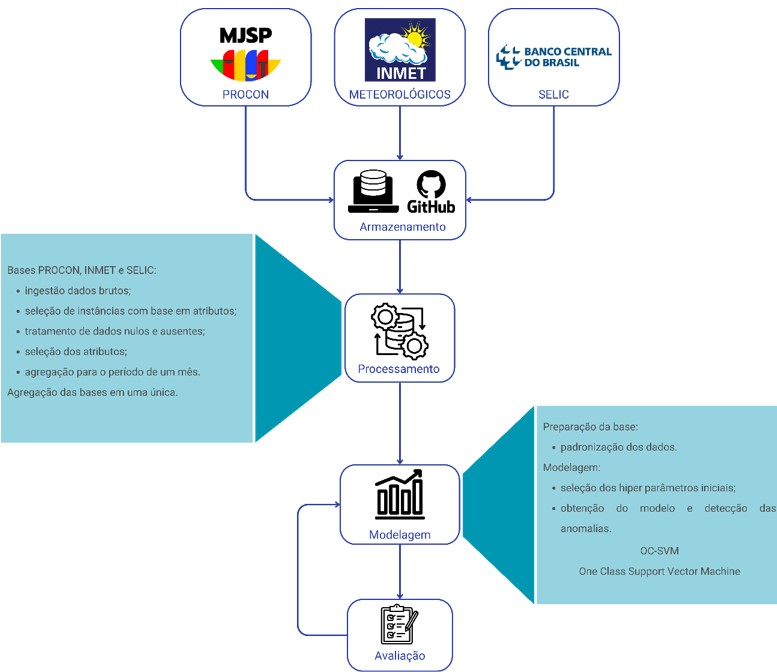



Após a aquisição dos dados, estes, cada qual em seu arquivo e formato, são armazenados localmente e em nuvem, a fim de facilitar o acesso, compartilhamento e desenvolvimento. A etapa seguinte consiste no processamento dos dados e envolve uma série de filtros, seleções, limpezas, transformações e agregações a fim de consolidar uma base confiável que atenda aos requisitos necessários para a etapa de modelagem. A seguir são apresentadas em detalhes cada ação que é performada sobre os dados de cada uma das fontes.

- Fonte de dados MJSP – PROCON: ingestão dados brutos e armazenamento em um dataframe, análise exploratória dos dados; seleção de instâncias cujo atributo correspondente a razão social corresponde a da empresa Energisa Mato Grosso; normalização dos dados e tratamento de dados nulos; seleção, via CEP, de reclamações referentes a cidade de Cuiabá e grande Cuiabá; seleção dos atributos de interesse (razão social e data de abertura da reclamação); criação do atributo quantidade de reclamações; agregação dos dados, via soma da quantidade de reclamações, para o período de um mês.

- Fonte de dados INMET: ingestão dados brutos e armazenamento em um dataframe (os arquivos cujos dados foram ingeridos são referentes a cidade de Cuiabá); análise exploratória dos dados; seleção dos atributos que representam a temperatura, precipitação e data e hora do registro; normalização dos dados e tratamento de dados nulos; tratamento de valores sem contextualização e decorrentes de falhas de equipamentos; agregação dos dados diários via soma da precipitação e valor máximo da temperatura; nova agregação, sobre a anterior, via soma da precipitação e média das temperaturas.

- Fonte de dados Banco Central do Brasil: ingestão dados brutos, via api do Banco Central do Brasil; filtro dos dados por data, para correspondência ao período de trabalho (2016 a 2022); tratamento de dados nulos; agregação dos dados para o período de um mês, via média dos valores da taxa.

Após os processamentos indicados acima, as bases individuais foram integradas em uma única, contendo o mês e ano (em um único atributo), a quantidade de reclamações fundamentadas pelo Procon contra a Energisa Mato Grosso, a temperatura do ar, a precipitação e a taxa Selic. O conjunto de dados consiste em uma série temporal de dimensão 4 (multidimensional), cujos registros correspondem a um período entre os anos de 2016 e 2022. É importante ressaltar que durante a análise exploratória dos dados referentes à base de dados do Procon, observou-se que embora os arquivos de dados brutos ingeridos compreendessem um intervalo de tempo de 2016 a 2022, as datas de aberturas das reclamações ali contidas compreendiam um período entre 2009 e 2022. Isso porque, os arquivos são organizados em função da data de finalização do processo de reclamação ao invés da data de abertura. Isso fez com que fosse necessário ingerir dados do Inmet e taxa Selic a partir de 2009 para que os períodos de tempo fossem equivalentes. A tratativa dos dados acerca desta descoberta é explorada e mais detalhes adiante.

Os dados da série foram modelados utilizando um algoritmo baseado no modelo One-Class Support Vector Machine (OC-SVM) para a detecção de anomalias sob o paradigma não supervisionado. Este algoritmo, que foi descrito anteriormente, tem como saída uma classificação numérica binária variando entre -1 e 1, sendo o primeiro caso atribuído a dados que descrevem anomalias. É importante ressaltar que os atributos que compreendem as dimensões da série precisaram ser padronizados, ou seja, substituídos por valores equivalentes em uma distribuição de probabilidade de média igual a zero e desvio padrão igual a um. Mais detalhes sobre este procedimento e sobre os argumentos da função do estimador, podem ser encontrados ao longo da apresentação do algoritmo.

Na próxima etapa será realizado um ajuste fino com foco na escolha dos hiper parâmetros do estimador que conduzem a um modelo melhor. E para a definição de qual é o melhor modelo, serão aplicadas métricas de validação.

Como a série é de quarta dimensão, é bastante difícil criar uma visualização eficaz que abranja todas as dimensões. Por este motivo, as visualizações são feitas de forma separada e unidimensional. Essa técnica tem por efeito somente a visualização e não representa o comportamento da série temporal estudada.


# **EDA e Pré-processamento dos dados**


Para execução do algoritmo a seguir, será necessário baixar os arquivos csv's disponíveis no drive da equipe, nas pastas CSV_Inmet e CSV_procon,  disponíveis em:  https://drive.google.com/drive/folders/1m7EY_hKVU4ABr3ldJK_6kr0AYCu_RoNs?usp=sharing  e realizar upload dos mesmos no googlecolab

In [ ]:
#Importacao das bibliotecas necessárias
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime
import regex as re
import numpy as np
import requests
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import OneClassSVM
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
#Ingestão dos arquivos csv procon para um dataframe pandas e tratamento
col_dic = {0: 'AnoCalendario', 1: 'DataArquivamento', 2: 'DataAbertura', 3: 'CodigoRegiao',
            4: 'Regiao', 5: 'UF', 6: 'strRazaoSocial', 7: 'strNomeFantasia', 8: 'Tipo', 9: 'NumeroCNPJ',
            10: 'RadicalCNPJ', 11: 'RazaoSocialRFB', 13: 'NomeFantasiaRFB', 14: 'CNAEPrincipal',
            15: 'DescCNAEPrincipal', 16: 'Atendida', 17: 'CodigoAssunto', 18: 'DescricaoAssunto',
            19: 'CodigoProblema', 20: 'DescricaoProblema', 21: 'SexoConsumidor', 22: 'FaixaEtariaConsumidor',
            23: 'CEPConsumidor'}
df_procon = pd.DataFrame()
for i in range (2016, 2023):
  path = '/content/CNRF_'+ str(i) +'.csv'
  aux = pd.read_csv(path, sep=';', on_bad_lines='skip')
  df_procon = pd.concat([df_procon, aux])
df_procon.rename(columns=col_dic, inplace=True)
df_procon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387696 entries, 0 to 68288
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AnoCalendario          387696 non-null  int64  
 1   DataArquivamento       387668 non-null  object 
 2   DataAbertura           387681 non-null  object 
 3   CodigoRegiao           387696 non-null  int64  
 4   Regiao                 387696 non-null  object 
 5   UF                     387696 non-null  object 
 6   strRazaoSocial         387690 non-null  object 
 7   strNomeFantasia        324325 non-null  object 
 8   Tipo                   387696 non-null  int64  
 9   NumeroCNPJ             371691 non-null  object 
 10  RadicalCNPJ            371156 non-null  float64
 11  RazaoSocialRFB         342787 non-null  object 
 12  NomeFantasiaRFB        170065 non-null  object 
 13  CNAEPrincipal          342787 non-null  float64
 14  DescCNAEPrincipal      340309 non-null  ob

##**Processamento (tratamento dos dados)**

In [ ]:
#ao concatenar, os dataframes são incorporados com seus índices originais
#aqui resetamos para uma única sequência
df_procon.reset_index(drop = True, inplace = True)

In [ ]:
#verificação de dados nulos
df_procon.isnull().sum()

AnoCalendario                 0
DataArquivamento             28
DataAbertura                 15
CodigoRegiao                  0
Regiao                        0
UF                            0
strRazaoSocial                6
strNomeFantasia           63371
Tipo                          0
NumeroCNPJ                16005
RadicalCNPJ               16540
RazaoSocialRFB            44909
NomeFantasiaRFB          217631
CNAEPrincipal             44909
DescCNAEPrincipal         47387
Atendida                      0
CodigoAssunto                14
DescricaoAssunto             14
CodigoProblema            65490
DescricaoProblema         65490
SexoConsumidor               53
FaixaEtariaConsumidor         0
CEPConsumidor             31479
dtype: int64

Neste ponto pudemos notar que a base de dados apresentava baixa padronização na inserção de dados. Caso o filtro aplicado fosse apenas o CNPJ poderia ocorrer uma perda de informação importante visto que para este atributo há 16005 dados nulos.

Por outro lado, embora a razão social só contenha 6 dados nulos, observarmos diferenças de digitação neste atributo (maiúsculas e minúsculas, diferentes conteúdos da string, entre outros).

In [ ]:
#verificação do tipo de dados contido no atributo CNPJ
df_procon['NumeroCNPJ'].value_counts()

NumeroCNPJ
4.043254e+13    7035
4.206050e+12    5656
5.423963e+12    5434
7.170938e+12    5037
2.558157e+12    4594
                ... 
7.906295e+12       1
8.152229e+12       1
1.114253e+13       1
1.665331e+13       1
2.312391e+12       1
Name: count, Length: 56837, dtype: int64

In [ ]:
df_procon['NumeroCNPJ'].isnull().sum()

16005

Como é possível perceber, os valores instanciados no CNPJ apresentam tipagem equivocada que levam a uma formatação numérica.

Como há 16005 valores ausentes, optamos por não  gastar custo operacinal para tratamento destes dados e utilizaremos a razão social para a filtragem dos dados.

In [ ]:
#criando um dataframe contendo somente os dados referentes a razões sociais atreladas a energisa mato grosso
filtro1 = df_procon['strRazaoSocial'].str.contains('energisa', flags=re.IGNORECASE, na=False)
filtro2 = df_procon['strRazaoSocial'].str.contains('mato grosso', flags=re.IGNORECASE, na=False)
filtro3 = df_procon['strRazaoSocial'].str.contains('sul', flags=re.IGNORECASE, na=False) == False
df_procon = df_procon[filtro1 & filtro2 & filtro3]
df_procon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2879 entries, 2936 to 386693
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AnoCalendario          2879 non-null   int64  
 1   DataArquivamento       2879 non-null   object 
 2   DataAbertura           2879 non-null   object 
 3   CodigoRegiao           2879 non-null   int64  
 4   Regiao                 2879 non-null   object 
 5   UF                     2879 non-null   object 
 6   strRazaoSocial         2879 non-null   object 
 7   strNomeFantasia        2846 non-null   object 
 8   Tipo                   2879 non-null   int64  
 9   NumeroCNPJ             2879 non-null   object 
 10  RadicalCNPJ            2879 non-null   float64
 11  RazaoSocialRFB         2879 non-null   object 
 12  NomeFantasiaRFB        1 non-null      object 
 13  CNAEPrincipal          2879 non-null   float64
 14  DescCNAEPrincipal      2879 non-null   object 
 15  Aten

In [ ]:
print(df_procon['strRazaoSocial'].unique())

['ENERGISA MATO GROSSO-DISTRIBUIDORA DE ENERGIA S/A'
 'ENERGISA MATO GROSSO DISTRIBUIDORA DE ENERGIA S.A'
 'ENERGISA MATO GROSSO DISTRIBUIDORA DE ENERGIA'
 'ENERGISA MATO GROSSO - DISTRIBUIDORA DE ENERGIA SA'
 'ENERGISA MATO GROSSO-DISTRIBUIDORA DE ENERGIA S.A.'
 'ENERGISA  MATO GROSSO DISTRIBUIDORA DE ENERGIA S.A'
 'ENERGISA MATO GROSSO - DISTRIBUIDORA DE ENERGIA S.'
 'ENERGISA MATO GROSSO' 'ENERGISA MATO GROSSO DISTRIBUIDORA DE ENERGIA @'
 'ENERGISA MATO GROSSO  DISTRIBUIDORA DE ENERGIA S/A'
 'ENERGISA MATO GROSSO - DISTRIBUIDORA S.A'
 'ENERGISA MATO GROSSO -DISTRIBUIDORA DE ENERGIA S.A'
 'ENERGISA MATO GROSSO- DISTRIBUIDORA DE ENERGIA S.A'
 'ENERGISA MATO GROSSO - DIST. DE ENERGIA S.A'
 'ENERGISA MATO GROSSO-DISTRIBUIDORA DE ENERGIA S.A']


In [ ]:
#uma maneira de verificar nossa seleção é avaliar os dados instanciados no dataframe filtrado, no atributo região
df_procon['Regiao'].value_counts()

Regiao
Centro-oeste    2878
Sudeste            1
Name: count, dtype: int64

In [ ]:
df_procon[df_procon['Regiao']=='Sudeste']

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,...,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor
192612,2016,2016-08-16 14:07:39.000,2016-05-18 09:57:56.000,3,Sudeste,SP,ENERGISA MATO GROSSO,NaN,1,15413826000150.0,...,3514000.0,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,N,185.0,Energia Elétrica,134.0,Cobrança indevida/abusiva,F,entre 41 a 50 anos,4917070.0


Embora a instância que contém o valor sudeste para o atributo região possa gerar estranheza, verificou-se que o CEP do reclamante, como esperado, não coincide com a região de Cuiabá que será utilizada para análise.

A filtragem para o range de CEPS de Cuiabá e região é apresentada a seguir.

In [ ]:
#filtro para somente a cidade de Cuiabá, via CEP
#78000-001 à 78109-999
df_procon['CEPConsumidor'].value_counts()

CEPConsumidor
78700000.0    401
78000000.0    284
78580000.0     76
78058000.0     67
78890000.0     53
             ... 
78700075.0      1
78455500.0      1
78735561.0      1
78700970.0      1
78075320.0      1
Name: count, Length: 999, dtype: int64

In [ ]:
df_procon['CEPConsumidor'].isnull().sum()

529

Das 2878 instâncias, 529 não possuem CEP declarado. Como o CEP é um fator importante para a seleção das reclamações atreladas a região de Curitiba, optou-se por excluir estes dados da base.

O grupo entende que é uma quantidade significativa de dados e que sua remoção pode levar resultados e insights bastante errôneo com relação a realidade. Por outro lado, fazer alegações de localidade sem comprovação levam ao mesmo problema.


In [ ]:
df_procon.loc[df_procon['CEPConsumidor'].notnull(), 'CEPConsumidor'] = df_procon['CEPConsumidor'].dropna()
df_procon['CEPConsumidor'].isnull().sum()

529

In [ ]:
df_procon.loc[:, 'CEPConsumidor'] = df_procon['CEPConsumidor'].astype('float')
df_procon['CEPConsumidor'].value_counts()

CEPConsumidor
78700000.0    401
78000000.0    284
78580000.0     76
78058000.0     67
78890000.0     53
             ... 
78700075.0      1
78455500.0      1
78735561.0      1
78700970.0      1
78075320.0      1
Name: count, Length: 999, dtype: int64

In [ ]:
#filtro para somente a região metropolitana de Cuiabá, via CEP
cep_list1 = np.arange(78000000,78175000)
cep_list2 = np.arange(78195000,78200000)
cep_list = np.concatenate((cep_list1, cep_list1))
df_procon = df_procon[df_procon['CEPConsumidor'].isin(cep_list)]
df_procon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1432 entries, 2978 to 386693
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AnoCalendario          1432 non-null   int64  
 1   DataArquivamento       1432 non-null   object 
 2   DataAbertura           1432 non-null   object 
 3   CodigoRegiao           1432 non-null   int64  
 4   Regiao                 1432 non-null   object 
 5   UF                     1432 non-null   object 
 6   strRazaoSocial         1432 non-null   object 
 7   strNomeFantasia        1432 non-null   object 
 8   Tipo                   1432 non-null   int64  
 9   NumeroCNPJ             1432 non-null   object 
 10  RadicalCNPJ            1432 non-null   float64
 11  RazaoSocialRFB         1432 non-null   object 
 12  NomeFantasiaRFB        0 non-null      object 
 13  CNAEPrincipal          1432 non-null   float64
 14  DescCNAEPrincipal      1432 non-null   object 
 15  Aten

In [ ]:
df_procon['DataAbertura'] = df_procon['DataAbertura'].astype('str')
df_procon['DataAbertura'] = df_procon['DataAbertura'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f"))
df_procon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1432 entries, 2978 to 386693
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   AnoCalendario          1432 non-null   int64         
 1   DataArquivamento       1432 non-null   object        
 2   DataAbertura           1432 non-null   datetime64[ns]
 3   CodigoRegiao           1432 non-null   int64         
 4   Regiao                 1432 non-null   object        
 5   UF                     1432 non-null   object        
 6   strRazaoSocial         1432 non-null   object        
 7   strNomeFantasia        1432 non-null   object        
 8   Tipo                   1432 non-null   int64         
 9   NumeroCNPJ             1432 non-null   object        
 10  RadicalCNPJ            1432 non-null   float64       
 11  RazaoSocialRFB         1432 non-null   object        
 12  NomeFantasiaRFB        0 non-null      object        
 13  CNA

In [ ]:
#criação do dataframe final que utilizaremos
#exclusão dos atributos que não seráo necessários
df_procon = df_procon[['DataAbertura', 'strRazaoSocial']]
df_procon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1432 entries, 2978 to 386693
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DataAbertura    1432 non-null   datetime64[ns]
 1   strRazaoSocial  1432 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 33.6+ KB


In [ ]:
#ajuste do index para a data para aplicação da função resample
df_procon = df_procon.set_index('DataAbertura')
df_procon.head()

,strRazaoSocial
DataAbertura,
2015-06-29 09:31:50,ENERGISA MATO GROSSO DISTRIBUIDORA DE ENERGIA
2015-04-13 13:14:16,ENERGISA MATO GROSSO DISTRIBUIDORA DE ENERGIA
2015-08-28 15:53:19,ENERGISA MATO GROSSO DISTRIBUIDORA DE ENERGIA
2015-06-08 13:26:06,ENERGISA MATO GROSSO DISTRIBUIDORA DE ENERGIA
2016-02-19 17:43:37,ENERGISA MATO GROSSO DISTRIBUIDORA DE ENERGIA


In [ ]:
# aplicação da função resample para definir a periodicidade da série temporal mensal
df_procon = df_procon.resample('1M').count()
df_procon = df_procon.reset_index()
df_procon.head()

,DataAbertura,strRazaoSocial
0,2009-05-31,1
1,2009-06-30,0
2,2009-07-31,0
3,2009-08-31,0
4,2009-09-30,0


In [ ]:
# alterando o nome da coluna que agreda a soma da quantidade de reclamações
df_procon.rename(columns = {'strRazaoSocial': 'Qtde_reclamacoes'}, inplace = True)
df_procon.head()

,DataAbertura,Qtde_reclamacoes
0,2009-05-31,1
1,2009-06-30,0
2,2009-07-31,0
3,2009-08-31,0
4,2009-09-30,0


In [ ]:
#verificando o período de abrangência da base para determinar o período de abrangência das outras bases
print(df_procon['DataAbertura'].min())
print(df_procon['DataAbertura'].max())

2009-05-31 00:00:00
2022-05-31 00:00:00


In [ ]:
#verificando de forma simples a distribuição da quantidade de reclamações da base
df_procon['Qtde_reclamacoes'].value_counts()

Qtde_reclamacoes
0     55
1     11
10     7
4      7
8      6
2      5
7      5
9      5
16     4
24     4
15     4
5      3
14     3
13     3
18     3
20     3
21     3
19     3
26     2
6      2
17     2
25     2
30     2
12     2
49     1
3      1
11     1
34     1
22     1
37     1
56     1
52     1
58     1
54     1
27     1
Name: count, dtype: int64

##**Ingestão dos arquivos csv inmet para um dataframe pandas e tratamento**

In [ ]:
#verificação do encoding dos arquivos
!pip install chardet
import chardet
for i in range(2009, 2023):
  path = '/content/INMET_CO_MT_A901_CUIABA_' + str(i) + '.CSV'
  with open(path, 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']
  print(f'File {path} has encoding {encoding}')

File /content/INMET_CO_MT_A901_CUIABA_2009.CSV has encoding ISO-8859-1
File /content/INMET_CO_MT_A901_CUIABA_2010.CSV has encoding ISO-8859-1
File /content/INMET_CO_MT_A901_CUIABA_2011.CSV has encoding ISO-8859-1
File /content/INMET_CO_MT_A901_CUIABA_2012.CSV has encoding ISO-8859-1
File /content/INMET_CO_MT_A901_CUIABA_2013.CSV has encoding ISO-8859-1
File /content/INMET_CO_MT_A901_CUIABA_2014.CSV has encoding ISO-8859-1
File /content/INMET_CO_MT_A901_CUIABA_2015.CSV has encoding ISO-8859-1
File /content/INMET_CO_MT_A901_CUIABA_2016.CSV has encoding ISO-8859-1
File /content/INMET_CO_MT_A901_CUIABA_2017.CSV has encoding ISO-8859-1
File /content/INMET_CO_MT_A901_CUIABA_2018.CSV has encoding ISO-8859-1
File /content/INMET_CO_MT_A901_CUIABA_2019.CSV has encoding ISO-8859-1
File /content/INMET_CO_MT_A901_CUIABA_2020.CSV has encoding ISO-8859-1
File /content/INMET_CO_MT_A901_CUIABA_2021.CSV has encoding ISO-8859-1
File /content/INMET_CO_MT_A901_CUIABA_2022.CSV has encoding ISO-8859-1


In [ ]:
#extraindo os dados dos arquivos e concatenando-os em um único dataframe
col_dic = {0: 'DATA',1: 'HORA_UTC', 2: 'PREC_TOTAL', 3: 'PRESS_ATM_mB',
           4: 'PRESS_MAX_H_ANTE_mB', 5: 'PRESS_MIN_H_ANTE_mB', 6: 'RAD_GLOBAL_KJ/m2',
           7: 'TEMP_AR_BULB_SECO_C', 8: 'TEMP_PT_ORVALHO_C', 9: 'TEMP_MAX_H_ANTE_C',
           10: 'TEMP_MIN_H_ANTE_C', 11: 'TEMP_ORVALHO_MAX_H_ANTE_C', 12: 'TEMP_ORVALHO_MIN_H_ANTE_C',
           13: 'UR_MAX_H_ANTE_%', 14: 'UR_MIN_H_ANTE_%', 15: 'UR_%', 16: 'DIR_VENTO_GR',
           17: 'RAJ_MAX_VENTO_m/s', 18: 'VEL_VENTO_m/s'}
df_inmet = pd.DataFrame()
for i in range (2009, 2023):
  path = '/content/INMET_CO_MT_A901_CUIABA_'+ str(i) +'.CSV'
  aux = pd.read_csv(path, sep = ';', header = None, decimal = ',', encoding = 'ISO-8859-1', skiprows=[0,1,2,3,4,5,6,7,8])
  df_inmet = pd.concat([df_inmet, aux])
df_inmet.rename(columns=col_dic, inplace=True)
df_inmet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122712 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   DATA                       122712 non-null  object 
 1   HORA_UTC                   122712 non-null  object 
 2   PREC_TOTAL                 118100 non-null  float64
 3   PRESS_ATM_mB               118100 non-null  float64
 4   PRESS_MAX_H_ANTE_mB        118079 non-null  float64
 5   PRESS_MIN_H_ANTE_mB        118079 non-null  float64
 6   RAD_GLOBAL_KJ/m2           104760 non-null  float64
 7   TEMP_AR_BULB_SECO_C        118100 non-null  float64
 8   TEMP_PT_ORVALHO_C          118100 non-null  float64
 9   TEMP_MAX_H_ANTE_C          118079 non-null  float64
 10  TEMP_MIN_H_ANTE_C          118079 non-null  float64
 11  TEMP_ORVALHO_MAX_H_ANTE_C  118079 non-null  float64
 12  TEMP_ORVALHO_MIN_H_ANTE_C  118079 non-null  float64
 13  UR_MAX_H_ANTE_%            118079 no

In [ ]:
#os indexes são importados da forma original, vamos resetar para obter uma numeração contínua
df_inmet.reset_index(inplace=True)

In [ ]:
#inspecionando os valores instanciados na coluna 19
df_inmet[19].info()

<class 'pandas.core.series.Series'>
RangeIndex: 122712 entries, 0 to 122711
Series name: 19
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 958.8 KB


In [ ]:
#excluindo a coluna 19 que não contém dados de interesse
df_inmet.drop(columns = [19], inplace = True)
df_inmet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122712 entries, 0 to 122711
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      122712 non-null  int64  
 1   DATA                       122712 non-null  object 
 2   HORA_UTC                   122712 non-null  object 
 3   PREC_TOTAL                 118100 non-null  float64
 4   PRESS_ATM_mB               118100 non-null  float64
 5   PRESS_MAX_H_ANTE_mB        118079 non-null  float64
 6   PRESS_MIN_H_ANTE_mB        118079 non-null  float64
 7   RAD_GLOBAL_KJ/m2           104760 non-null  float64
 8   TEMP_AR_BULB_SECO_C        118100 non-null  float64
 9   TEMP_PT_ORVALHO_C          118100 non-null  float64
 10  TEMP_MAX_H_ANTE_C          118079 non-null  float64
 11  TEMP_MIN_H_ANTE_C          118079 non-null  float64
 12  TEMP_ORVALHO_MAX_H_ANTE_C  118079 non-null  float64
 13  TEMP_ORVALHO_MIN_H_ANTE_C  11

In [ ]:
#seleção das colunas que contém dados de interesse
df_inmet = df_inmet[['DATA', 'HORA_UTC', 'PREC_TOTAL', 'TEMP_AR_BULB_SECO_C']]
df_inmet.shape

(122712, 4)

In [ ]:
#verificação de dados nulos
df_inmet.isnull().sum()

DATA                      0
HORA_UTC                  0
PREC_TOTAL             4612
TEMP_AR_BULB_SECO_C    4612
dtype: int64

O dataframe contém quase a mesma quantidade dos valores nulos, isso porque quando não foi registrado a PREC_TOTAL (precipitação total) não foi registrado também a temperatura. Como a medição se dá a cada hora, espera-se que a exclusão destes dados não afete siginificativamente a agregação da base.

In [ ]:
df_inmet = df_inmet.dropna(subset=['PREC_TOTAL'])
df_inmet.isnull().sum()

DATA                   0
HORA_UTC               0
PREC_TOTAL             0
TEMP_AR_BULB_SECO_C    0
dtype: int64

In [ ]:
#inspecionando a base
df_inmet.head()

,DATA,HORA_UTC,PREC_TOTAL,TEMP_AR_BULB_SECO_C
0,2009-01-01,00:00,0.0,27.5
1,2009-01-01,01:00,0.0,27.5
2,2009-01-01,02:00,0.0,27.3
3,2009-01-01,03:00,0.0,26.4
4,2009-01-01,04:00,0.0,25.5


In [ ]:
df_inmet['PREC_TOTAL'].value_counts()

PREC_TOTAL
 0.0       100841
-9999.0     11933
 0.2         1703
 0.4          577
 0.6          334
            ...  
 48.2           1
 19.8           1
 45.8           1
 59.0           1
 34.2           1
Name: count, Length: 187, dtype: int64

Verificamos que alguns valores de precipitação são iguais a -9999. É possível que estes registros decorram de erros de sensores, ou alguma falha do sistema. Buscamos entender a relação destes dados com os demais atributos da base.

In [ ]:
valores_nulos = df_inmet[df_inmet['PREC_TOTAL'] == -9999]
valores_nulos.head(20)

,DATA,HORA_UTC,PREC_TOTAL,TEMP_AR_BULB_SECO_C
79,2009-01-04,07:00,-9999.0,-9999.0
80,2009-01-04,08:00,-9999.0,-9999.0
81,2009-01-04,09:00,-9999.0,-9999.0
82,2009-01-04,10:00,-9999.0,-9999.0
83,2009-01-04,11:00,-9999.0,-9999.0
251,2009-01-11,11:00,-9999.0,-9999.0
271,2009-01-12,07:00,-9999.0,-9999.0
272,2009-01-12,08:00,-9999.0,-9999.0
273,2009-01-12,09:00,-9999.0,-9999.0
274,2009-01-12,10:00,-9999.0,-9999.0


Pela forma sequencial que estes dados são encontrados e considerando que a ocorrência se apresenta simultaneamente para precipitação e temperatura, é possível afirmar que se trata de algum tipo de erro de equipamento.

In [ ]:
# Remover linhas onde qualquer coluna contém o valor -9999.0
df_inmet = df_inmet[df_inmet.ne(-9999.0).all(axis=1)]
# Verificar o novo tamanho do DataFrame após a remoção dos valores -9999.0
print("Tamanho do DataFrame após remover os valores -9999.0:", df_inmet.shape)

Tamanho do DataFrame após remover os valores -9999.0: (105934, 4)


In [ ]:
# Uma nova contagem após a limpeza
df_inmet['PREC_TOTAL'].value_counts()

PREC_TOTAL
0.0     100624
0.2       1696
0.4        576
0.6        334
0.8        255
         ...  
41.6         1
36.4         1
45.6         1
68.2         1
34.2         1
Name: count, Length: 186, dtype: int64

Alguns campos em HORA_UTC onde fogem do padrão de hora. Alguns campos estão 'HORA' UTC e será realizada a correção via função.

In [ ]:
# Função para corrigir os valores na coluna HORA_UTC
def corrigir_hora(valor):
    # Usar expressão regular para extrair hora e minuto
    match = re.match(r'(\d{2})(\d{2}) UTC', valor)
    if match:
        hora = match.group(1)
        minuto = match.group(2)
        return f"{hora}:{minuto}"
    else:
        return valor  # Retorna o valor original se não houver correspondência

# Aplicar a função corrigir_hora à coluna HORA_UTC
df_inmet['HORA_UTC'] = df_inmet['HORA_UTC'].apply(corrigir_hora)

# Imprimindo os valores da coluna HORA_UTC
df_inmet['HORA_UTC'].value_counts()

HORA_UTC
15:00    4521
16:00    4519
17:00    4516
14:00    4515
13:00    4511
18:00    4484
19:00    4480
20:00    4465
12:00    4457
21:00    4445
22:00    4435
06:00    4414
05:00    4409
11:00    4408
07:00    4403
09:00    4402
08:00    4398
10:00    4396
04:00    4382
03:00    4326
23:00    4299
02:00    4288
01:00    4253
00:00    4208
Name: count, dtype: int64

A base possui datas no formato YYYY/MM/DD e outros como YYYY-MM-DD. Será realizado tratamento para padronização

In [ ]:
# Uma nova amostra após as limpezas
df_inmet.head()

,DATA,HORA_UTC,PREC_TOTAL,TEMP_AR_BULB_SECO_C
0,2009-01-01,00:00,0.0,27.5
1,2009-01-01,01:00,0.0,27.5
2,2009-01-01,02:00,0.0,27.3
3,2009-01-01,03:00,0.0,26.4
4,2009-01-01,04:00,0.0,25.5


In [ ]:
df_inmet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105934 entries, 0 to 122710
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DATA                 105934 non-null  object 
 1   HORA_UTC             105934 non-null  object 
 2   PREC_TOTAL           105934 non-null  float64
 3   TEMP_AR_BULB_SECO_C  105934 non-null  float64
dtypes: float64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
df_inmet['DATA'].value_counts()

DATA
2009-01-01    24
2017-01-05    24
2016-12-24    24
2016-12-25    24
2016-12-26    24
              ..
2017-10-02     1
2014-05-23     1
2017-10-06     1
2009-03-11     1
2017-09-25     1
Name: count, Length: 4651, dtype: int64

In [ ]:
# Substituir '/' por '-' na coluna 'DATA' usando uma função lambda e apply
df_inmet['DATA'] = df_inmet['DATA'].apply(lambda x: x.replace('/', '-'))

In [ ]:
# Concatenando HORA e DATA no campo DATA e convertendo formato de Datetime
df_inmet['DATA'] = df_inmet['DATA'].astype(str) + ' ' + df_inmet['HORA_UTC'].astype(str)
df_inmet['DATA'] = pd.to_datetime(df_inmet['DATA'])

In [ ]:
df_inmet.drop(columns=['HORA_UTC'], inplace=True)
df_inmet.head()

,DATA,PREC_TOTAL,TEMP_AR_BULB_SECO_C
0,2009-01-01 00:00:00,0.0,27.5
1,2009-01-01 01:00:00,0.0,27.5
2,2009-01-01 02:00:00,0.0,27.3
3,2009-01-01 03:00:00,0.0,26.4
4,2009-01-01 04:00:00,0.0,25.5


In [ ]:
df_inmet1 = df_inmet[['DATA', 'PREC_TOTAL']]
df_inmet1 = df_inmet1.set_index('DATA')
df_inmet1 = df_inmet1.resample('1D').sum()
df_inmet1 = df_inmet1.reset_index()
df_inmet1.head()

,DATA,PREC_TOTAL
0,2009-01-01,0.0
1,2009-01-02,0.0
2,2009-01-03,1.2
3,2009-01-04,2.0
4,2009-01-05,0.0


In [ ]:
df_inmet2 = df_inmet[['DATA', 'TEMP_AR_BULB_SECO_C']]
df_inmet2 = df_inmet2.set_index('DATA')
df_inmet2 = df_inmet2.resample('1D').max()
df_inmet2 = df_inmet2.reset_index()
df_inmet2.head()

,DATA,TEMP_AR_BULB_SECO_C
0,2009-01-01,35.2
1,2009-01-02,36.2
2,2009-01-03,32.9
3,2009-01-04,27.8
4,2009-01-05,31.1


In [ ]:
# Utilizando o RESAMPLE, os dados serão tratados trazidos para a mesma periodicidade da base do procon: 1 mês
df_inmet1 = df_inmet1.set_index('DATA')
df_inmet1 = df_inmet1.resample('1M').sum()
df_inmet1 = df_inmet1.reset_index()
df_inmet1.head()

,DATA,PREC_TOTAL
0,2009-01-31,106.0
1,2009-02-28,182.8
2,2009-03-31,140.6
3,2009-04-30,79.8
4,2009-05-31,46.0


In [ ]:
df_inmet2 = df_inmet2.set_index('DATA')
df_inmet2 = df_inmet2.resample('1M').mean()
df_inmet2 = df_inmet2.reset_index()
df_inmet2.head()

,DATA,TEMP_AR_BULB_SECO_C
0,2009-01-31,33.312903
1,2009-02-28,32.729167
2,2009-03-31,32.250000
3,2009-04-30,31.576667
4,2009-05-31,31.709677


##**Ingestão dos dados da taxa Selic via api, para um dataframe pandas e tratamento**

In [ ]:
# URL para acessar os dados da taxa SELIC em formato JSON
url = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=json"

# Fazendo a solicitação HTTP
response = requests.get(url)

# Verificando se a solicitação foi bem sucedida
if response.status_code == 200:
    # Convertendo os dados JSON em um DataFrame
    data = response.json()
    df_bc = pd.DataFrame(data)
    # Convertendo a coluna 'data' para o tipo datetime
    df_bc['data'] = pd.to_datetime(df_bc['data'], format='%d/%m/%Y')
    # Convertendo a coluna 'valor' para o tipo float
    df_bc['valor'] = df_bc['valor'].astype(float)
    # Renomeando as colunas
    df_bc.columns = ['Data', 'Taxa SELIC']

    print(df_bc)

else:
    print("Falha ao acessar os dados da taxa SELIC")

           Data  Taxa SELIC
0    1986-06-04    0.065041
1    1986-06-05    0.067397
2    1986-06-06    0.066740
3    1986-06-09    0.068247
4    1986-06-10    0.067041
...         ...         ...
9498 2024-04-26    0.040168
9499 2024-04-29    0.040168
9500 2024-04-30    0.040168
9501 2024-05-02    0.040168
9502 2024-05-03    0.040168

[9503 rows x 2 columns]


In [ ]:
df_bc['Ano Calendário'] = df_bc['Data'].dt.year

In [ ]:
df_bc = df_bc.loc[df_bc['Ano Calendário'] >= 2009]
df_bc = df_bc.loc[df_bc['Ano Calendário'] <= 2022]
df_bc['Ano Calendário'].unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022], dtype=int32)

In [ ]:
#removendo a coluna ano calendário que não será mais útil
df_bc.drop(columns=['Ano Calendário'], inplace=True)
# Definindo a coluna 'Data' como índice do DataFrame
df_bc.set_index('Data', inplace=True)
# Resample para mensal e calcular a média da taxa SELIC para cada período
df_bc = df_bc.resample('1M').mean()
df_bc = df_bc.reset_index()
df_bc.head()

,Data,Taxa SELIC
0,2009-01-31,0.049648
1,2009-02-28,0.047314
2,2009-03-31,0.043928
3,2009-04-30,0.041812
4,2009-05-31,0.038404


##**Integração das bases individuais em uma base de dados única**

In [ ]:
#antes da integração de fato, precisamos alterar o datetime de cada base para o formato de "%Y-%m
#isso garantirá que diferenças de dias não afetem a junção. O dia 1 do mês de janeiro não delimita o início do mês na base do BC, por exemplo,
#mas, delimita na base do inmet
df_procon.rename(columns = {'DataAbertura':'Data'}, inplace=True)
df_procon['Data']=df_procon['Data'].apply(lambda x: format(x, "%m/%Y"))
df_procon.head()

,Data,Qtde_reclamacoes
0,05/2009,1
1,06/2009,0
2,07/2009,0
3,08/2009,0
4,09/2009,0


In [ ]:
df_inmet1.rename(columns = {'DATA':'Data'}, inplace=True)
df_inmet1['Data']=df_inmet1['Data'].apply(lambda x: format(x, "%m/%Y"))
df_inmet1.head()

,Data,PREC_TOTAL
0,01/2009,106.0
1,02/2009,182.8
2,03/2009,140.6
3,04/2009,79.8
4,05/2009,46.0


In [ ]:
df_inmet2.rename(columns = {'DATA':'Data'}, inplace=True)
df_inmet2['Data']=df_inmet2['Data'].apply(lambda x: format(x, "%m/%Y"))
df_inmet2.head()

,Data,TEMP_AR_BULB_SECO_C
0,01/2009,33.312903
1,02/2009,32.729167
2,03/2009,32.250000
3,04/2009,31.576667
4,05/2009,31.709677


In [ ]:
df_bc['Data']=df_bc['Data'].apply(lambda x: format(x, "%m/%Y"))
df_bc.head()

,Data,Taxa SELIC
0,01/2009,0.049648
1,02/2009,0.047314
2,03/2009,0.043928
3,04/2009,0.041812
4,05/2009,0.038404


In [ ]:
#Vamos entender a abrângência em data dos dados do procon
print(df_procon.shape)
print(df_procon.iloc[0]['Data'])
print(df_procon.iloc[156]['Data'])

(157, 2)
05/2009
05/2022


In [ ]:
df = df_procon.merge(df_inmet1, how='left', on='Data')
df = df.merge(df_inmet2, how='left', on='Data')
df = df.merge(df_bc, how='left', on='Data')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Data                 157 non-null    object 
 1   Qtde_reclamacoes     157 non-null    int64  
 2   PREC_TOTAL           157 non-null    float64
 3   TEMP_AR_BULB_SECO_C  150 non-null    float64
 4   Taxa SELIC           157 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 6.3+ KB


In [ ]:
df.head()

,Data,Qtde_reclamacoes,PREC_TOTAL,TEMP_AR_BULB_SECO_C,Taxa SELIC
0,05/2009,1,46.0,31.709677,0.038404
1,06/2009,0,42.4,28.793333,0.036163
2,07/2009,0,27.0,31.529032,0.034225
3,08/2009,0,79.4,33.706452,0.032927
4,09/2009,0,58.2,33.450000,0.032927


In [ ]:
df.isnull().sum()

Data                   0
Qtde_reclamacoes       0
PREC_TOTAL             0
TEMP_AR_BULB_SECO_C    7
Taxa SELIC             0
dtype: int64

Temos 7 valores ausentes na temperatura. Vamos inspecionar as instâncias que os contém:

In [ ]:
df[df['TEMP_AR_BULB_SECO_C'].isnull()]

,Data,Qtde_reclamacoes,PREC_TOTAL,TEMP_AR_BULB_SECO_C,Taxa SELIC
18,11/2010,0,0.0,NaN,0.040203
19,12/2010,1,0.0,NaN,0.040208
20,01/2011,0,0.0,NaN,0.040895
21,02/2011,0,0.0,NaN,0.042027
22,03/2011,0,0.0,NaN,0.043640
23,04/2011,0,0.0,NaN,0.044044
123,08/2019,12,0.0,NaN,0.022751


Segundo a documentação da função resample, da biblioteca pandas: ao reamostrar dados, podem aparecer valores ausentes (por exemplo, quando a frequência de reamostragem é maior que a frequência original).

É possível, no momento em que o método resample é aplicado, aplicar o método fillna com parâmteros ajustados para indicar de qual maneira os valores ausentes serão preenchidos.

A ideia, sobretudo náo se aplica para este caso. Isso porque, por termos removido muitos dados ausentes ou discrepantes da base do inmet, muitas datas deixaram de existir, adicionando um período amostral superior ao período de reamostragem.

Uma das maneiras de tratar o problema é retornar à base original e investigar os melhores métodos estatísticos que, com base nos dados exixtentes, objetive predizer os dados ausentes.

No entanto, por facilidade, o grupo decidiu tartar os dados neste ponto, utilizando aproximações por períodos equivalentes em anos anteriores e ou posteriores. Para a data de 08/2019, por exemplo, o valor de temperatura será preenchido com o valor médio entre aqueles obtidos para todos os anos no mesmo mês.

In [ ]:
df.loc[123,'TEMP_AR_BULB_SECO_C'] = df[df['Data'].str.contains('08/', na=False)]['TEMP_AR_BULB_SECO_C'].mean()
df.loc[23,'TEMP_AR_BULB_SECO_C'] = df[df['Data'].str.contains('04/', na=False)]['TEMP_AR_BULB_SECO_C'].mean()
df.loc[22,'TEMP_AR_BULB_SECO_C'] = df[df['Data'].str.contains('03/', na=False)]['TEMP_AR_BULB_SECO_C'].mean()
df.loc[21,'TEMP_AR_BULB_SECO_C'] = df[df['Data'].str.contains('02/', na=False)]['TEMP_AR_BULB_SECO_C'].mean()
df.loc[20,'TEMP_AR_BULB_SECO_C'] = df[df['Data'].str.contains('01/', na=False)]['TEMP_AR_BULB_SECO_C'].mean()
df.loc[19,'TEMP_AR_BULB_SECO_C'] = df[df['Data'].str.contains('12/', na=False)]['TEMP_AR_BULB_SECO_C'].mean()
df.loc[18,'TEMP_AR_BULB_SECO_C'] = df[df['Data'].str.contains('11/', na=False)]['TEMP_AR_BULB_SECO_C'].mean()
df[df['TEMP_AR_BULB_SECO_C'].isnull()]

,Data,Qtde_reclamacoes,PREC_TOTAL,TEMP_AR_BULB_SECO_C,Taxa SELIC


##**Visualização da série tratada**

Aqui a visualização é apresentada de forma separada e unidimensional. A ideia é conseguir, por meio de efeito visual, entender se mais algum tratamento deve ser aplicado à base.

In [ ]:
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, x_title='')
fig.append_trace(go.Scatter(x=df['Data'], y=df['Qtde_reclamacoes'], name='Qtde_Reclamações'), row=1, col=1)
fig.append_trace(go.Scatter(x=df['Data'], y=df['PREC_TOTAL'], name='Precipitação'), row=2, col=1)
fig.append_trace(go.Scatter(x=df['Data'], y=df['TEMP_AR_BULB_SECO_C'], name='Temperatura'), row=3, col=1)
fig.append_trace(go.Scatter(x=df['Data'], y=df['Taxa SELIC'], name='Selic'), row=4, col=1)
fig.update_layout(title={'text':'Série Temporal', 'x': 0.47, 'xanchor': 'center','yanchor': 'top', 'font_color': 'Grey', 'font_size': 30})
fig.show()

##**Refinamento da base**

De fato, observou-se que a quantidade de reclamações com data de abertura inferior a 2015 é discrepantemente pequena em relação aos outros anos. Isso porque, os arquivos brutos trazem reclamações que foram encerradas entre 2016 e 2022. É natural imaginar que uma pequena quantidade de reclamações abertas em anos anteriores a 2015, ainda não tenham sido encerradas a partir de 2016.

Por este motivo, para evitar perda de contexto, serão excluídas da base de dados, as instâncias anteriores a 2015.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Data                 157 non-null    object 
 1   Qtde_reclamacoes     157 non-null    int64  
 2   PREC_TOTAL           157 non-null    float64
 3   TEMP_AR_BULB_SECO_C  157 non-null    float64
 4   Taxa SELIC           157 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 6.3+ KB


In [ ]:
df['Data']= df['Data'].apply(lambda x: datetime.strptime(x, '%m/%Y'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Data                 157 non-null    datetime64[ns]
 1   Qtde_reclamacoes     157 non-null    int64         
 2   PREC_TOTAL           157 non-null    float64       
 3   TEMP_AR_BULB_SECO_C  157 non-null    float64       
 4   Taxa SELIC           157 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 6.3 KB


In [ ]:
df = df[df['Data'] >= datetime.strptime('01/2015', '%m/%Y')]
df.head()

,Data,Qtde_reclamacoes,PREC_TOTAL,TEMP_AR_BULB_SECO_C,Taxa SELIC
68,2015-01-01,9,149.2,32.774194,0.044330
69,2015-02-01,20,27.4,33.600000,0.045513
70,2015-03-01,12,175.6,31.693750,0.047038
71,2015-04-01,24,140.0,31.556667,0.047376
72,2015-05-01,24,48.8,30.787097,0.049037


In [ ]:
df.reset_index(inplace = True)
df.head()

,index,Data,Qtde_reclamacoes,PREC_TOTAL,TEMP_AR_BULB_SECO_C,Taxa SELIC
0,68,2015-01-01,9,149.2,32.774194,0.044330
1,69,2015-02-01,20,27.4,33.600000,0.045513
2,70,2015-03-01,12,175.6,31.693750,0.047038
3,71,2015-04-01,24,140.0,31.556667,0.047376
4,72,2015-05-01,24,48.8,30.787097,0.049037


In [ ]:
df.drop(columns=['index'], inplace=True)
df.rename(columns={'PREC_TOTAL': 'Precipitacao', 'TEMP_AR_BULB_SECO_C': 'Temperatura_C', 'Taxa SELIC': 'Selic'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data              89 non-null     datetime64[ns]
 1   Qtde_reclamacoes  89 non-null     int64         
 2   Precipitacao      89 non-null     float64       
 3   Temperatura_C     89 non-null     float64       
 4   Selic             89 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 3.6 KB


# **Modelo base**

Aqui será utilizado, como explicado em seções anteriores, o modelo OC-SVM para detectar anomalias na série temporal multivariada composta pelos atribiutos da base df, construída.
É importante ressaltar, mais uma vez, que a ideia não é detectar padrões óbvios de dependência entre a quantidade de reclamações abertas contra a Energia Mato Grosso e os atributos selecionados (precipitação, temperatura e taxa Selic). Isso porque, a dependência entre estes fatores é amplamente abordada na literatura.
A ideia aqui é, frente uma série temporal que já considera as dependências entre os atributos selecionados, identificar possíveis anomalias e, frente a essas descobertas direcionar a empresa de fornecimento de energia para aperfeiçoamento de setores e recursos a fim de melhorar a qualidade do serviço prestado.

##**Aplicação do modelo**

In [ ]:
#convertendo o dataframe para excel pode-se facilmente reexecutar o código a partir deste ponto
#sem que seja necessário carregar todos os outros arquivos e executar todo o código anterior
#demandando custo de tempo e de processamento
df.to_excel('Série_Multidimensional.xlsx')

In [ ]:
df = pd.read_excel('Série_Multidimensional.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        89 non-null     int64         
 1   Data              89 non-null     datetime64[ns]
 2   Qtde_reclamacoes  89 non-null     int64         
 3   Precipitacao      89 non-null     float64       
 4   Temperatura_C     89 non-null     float64       
 5   Selic             89 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 4.3 KB


In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data              89 non-null     datetime64[ns]
 1   Qtde_reclamacoes  89 non-null     int64         
 2   Precipitacao      89 non-null     float64       
 3   Temperatura_C     89 non-null     float64       
 4   Selic             89 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 3.6 KB


Segundo a documentação da biblioteca Scikit Learn, (disponívem em https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing) muitos elementos usados ​​na função objetivo de um algoritmo de aprendizagem de máquina, tal como o kernel RBF dos algoritmos da classe Support Vector Machines, como é utilizado neste trabalho, geralmente assumem que todos os recursos estão centrados em torno do valor zero e que têm variância na mesma ordem de grandeza. Se um recurso apresentar variância com uma ordem de grandeza maior do que outros, ele poderá se sobrepor na função objetivo e tornar o estimador incapaz de aprender com os outros recursos corretamente, conforme esperado.

Por este motivo, é recomendado que faça-se uso de uma padronização sobre os dados (recursos) da base. Essa padronização, transforma os valores dos recursos para garantir que cada um deles possua média igual a zero e desvio padrão igual a 1.

In [ ]:
df_normal = StandardScaler().fit_transform(df[['Qtde_reclamacoes', 'Precipitacao', 'Temperatura_C', 'Selic']])
df_normal = pd.DataFrame(df_normal, columns=['Qtde_reclamacoes', 'Precipitacao', 'Temperatura_C', 'Selic'])
df_normal.head()

,Qtde_reclamacoes,Precipitacao,Temperatura_C,Selic
0,-0.545880,0.568737,-0.063204,0.838078
1,0.347793,-0.685887,0.357065,0.914943
2,-0.302151,0.840675,-0.613064,1.014070
3,0.672765,0.473971,-0.682829,1.036010
4,0.672765,-0.465452,-1.074478,1.143980


Um dos parâmetros que deve ser definido para o estimador OC-SVM é o tipo de função de Kernel que será utilizada para estimar a separação entre as classes, nessa aplicação, dados anômalos de dados "normais". É importante ressaltar que o tipo de função de Kernel escolhida é utilizada para determinar como, em alta dimensionalidade, o hiperplano de separação entre as classes será construído. O tipo Radial Basis Function (RBF) o padrão em todos os algorimos da classe SVM, da biblioteca Scikit Learn e faz uso de uma função gaussiana para encontrar o hiperplano. Esse tipo faz parte de um dos tipos ofertados e que lida com classes não linearmente separáveis. Por este motivo, RBF é o tipo de função de Kernel utilizada na primeira modelagem apresentada a seguir.

Outro parâmetro importante é o "gamma". Ele mede o quão longe um elemento do conjunto de dados pode influenciar o espaço ao seu redor. Este parâmetro pode ser definido, então, como o inverso do raio de influência das amostras selecionadas pelo modelo como vetores de suporte. Ele pode ser definido diretamente por um valor de ponto flutuante, ou ajustado para "scale" e "auto", sendo que cada uma dessas opções resulta em um cálculo diferente para o parâmetro, mas, dependente do número de recursos. Quanto menor o valor, maior será o raio de influência das amostras dos vetores de suporte.

Embora haja outros parâmetros possíveis de se ajustar ao utilizar o estimados OC-SVM, o terceiro e último utilizado neste trabalho é o parâmetro "nu". Ele corresponde a um valor que deve estar dentro do intervalo de 0 a 1 e estabelece o limite superior para a fração de erros do modelo e o limite inferior para a fração de vetores de suporte.

Na próxima etapa do projeto, será utilizado o método GridSearch, ofertado pela biblioteca Scikit Learn para encontrar os hiperparâmetros do estimador OC-SVM que resultam em um modelo mais adequado. Por hora, além do tipo RBF para o Kenrel, decidiu-se ajustar o parâmetro "nu"para um valor baixo (0,1), solicitando ao estimador que o modelo ajustado seja pouco tolerante a erros, e o parâmetro "gamma" para um valor baixo também (0,1), implicando em estabelecer uma raio de influência elevado dos elementos dos vetores de suporte.

In [ ]:
model = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
model.fit(df_normal)
array_label = model.predict(df_normal)
array_label

array([ 1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1])

Por definição, segundo a documentação da biblioteca Scikitlearn (https://scikit-learn.org/stable/modules/outlier_detection.html#outlier-detection), os dados rotulados como -1 referm-se a dados anômalos.

In [ ]:
#tratativa na intenção de observar os pontos anômalos
#lembrando que, a título de visualização, os atributos serão apresentados em séries temporais distintas
#no entanto, é importante lembrar que são tratados, neste trabalho, como uma única série multivariada
#mas, que dada sua dimensionalidade, não pode ser visualizada
df['Label'] = array_label
df.head()

,Data,Qtde_reclamacoes,Precipitacao,Temperatura_C,Selic,Label
0,2015-01-01,9,149.2,32.774194,0.044330,1
1,2015-02-01,20,27.4,33.600000,0.045513,1
2,2015-03-01,12,175.6,31.693750,0.047038,1
3,2015-04-01,24,140.0,31.556667,0.047376,1
4,2015-05-01,24,48.8,30.787097,0.049037,1


In [ ]:
#criando um dataframe que contém somente os dados com label -1 (anomalias)
aux = df[df['Label']==-1]
aux.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 6 to 80
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data              11 non-null     datetime64[ns]
 1   Qtde_reclamacoes  11 non-null     int64         
 2   Precipitacao      11 non-null     float64       
 3   Temperatura_C     11 non-null     float64       
 4   Selic             11 non-null     float64       
 5   Label             11 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 616.0 bytes


In [ ]:
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, x_title='')
fig.append_trace(go.Scatter(x=df['Data'], y=df['Qtde_reclamacoes'], name='Qtde_Reclamações'), row=1, col=1)
fig.add_trace(go.Scatter(x=aux['Data'], y=aux['Qtde_reclamacoes'], mode='markers', marker_color = 'black', marker=dict(size=9), name='Anomalias'), row=1, col=1)
fig.append_trace(go.Scatter(x=df['Data'], y=df['Precipitacao'], name='Precipitação'), row=2, col=1)
fig.add_trace(go.Scatter(x=aux['Data'], y=aux['Precipitacao'], mode='markers', marker_color = 'black', marker=dict(size=9), name='Anomalias'), row=2, col=1)
fig.append_trace(go.Scatter(x=df['Data'], y=df['Temperatura_C'], name='Temperatura'), row=3, col=1)
fig.add_trace(go.Scatter(x=aux['Data'], y=aux['Temperatura_C'], mode='markers', marker_color = 'black', marker=dict(size=9), name='Anomalias'), row=3, col=1)
fig.append_trace(go.Scatter(x=df['Data'], y=df['Selic'], name='Selic'), row=4, col=1)
fig.add_trace(go.Scatter(x=aux['Data'], y=aux['Selic'], mode='markers', marker_color = 'black', marker=dict(size=9), name='Anomalias'), row=4, col=1)
fig.update_layout(title={'text':'Série Temporal', 'x': 0.47, 'xanchor': 'center','yanchor': 'top', 'font_color': 'Grey', 'font_size': 30})
fig.show()

Antes de concluir algo é importante, mais uma vez, ressaltar que ao inferirmos uma série temporal multivariada, composta pelos recursos, número de reclamações protocoladas junto ao PROCON (Energisa Mato Grosso), temperatura, precipitação e taxa Selic, já estamos assumindo que essas variáveis são interdependentes e, portanto, não é o objetivo deste trabalho tratar sobre essa dependência. O objetivo aqui é detectar anomalias no conjunto de dados definidos por essas variáveis, que auxiliem a Energisa Mato Grosso a encontrar e, possivelmente tratar os motivos que levaram a tais anomalias, sobretudo quando as mesmas envolverem um elevado número de reclamações. Por exemplo, vemos que em Agosto de 2015 com uma baixa precipitação, temperaturas elevadas e a economia em alta, o número de reclamações foi elevado. Este ponto da série multidemsional foi considerado pelo modelo uma anomalia. Isso significa que a dependência entre os recursos não se mostrou dentro do padrão esperado para a série. Agora pressuponha que, em mãos deste resultado a Energisa inspecione seus processos e recursos e encontre que, neste mês, um componente de um novo fornecedor foi utilizado para isolar os fios das redes urbanas. Pode ser um motivo e pode ser tratado, evitando tal fornecedor futuramente.

# **Cronograma**



  
  # **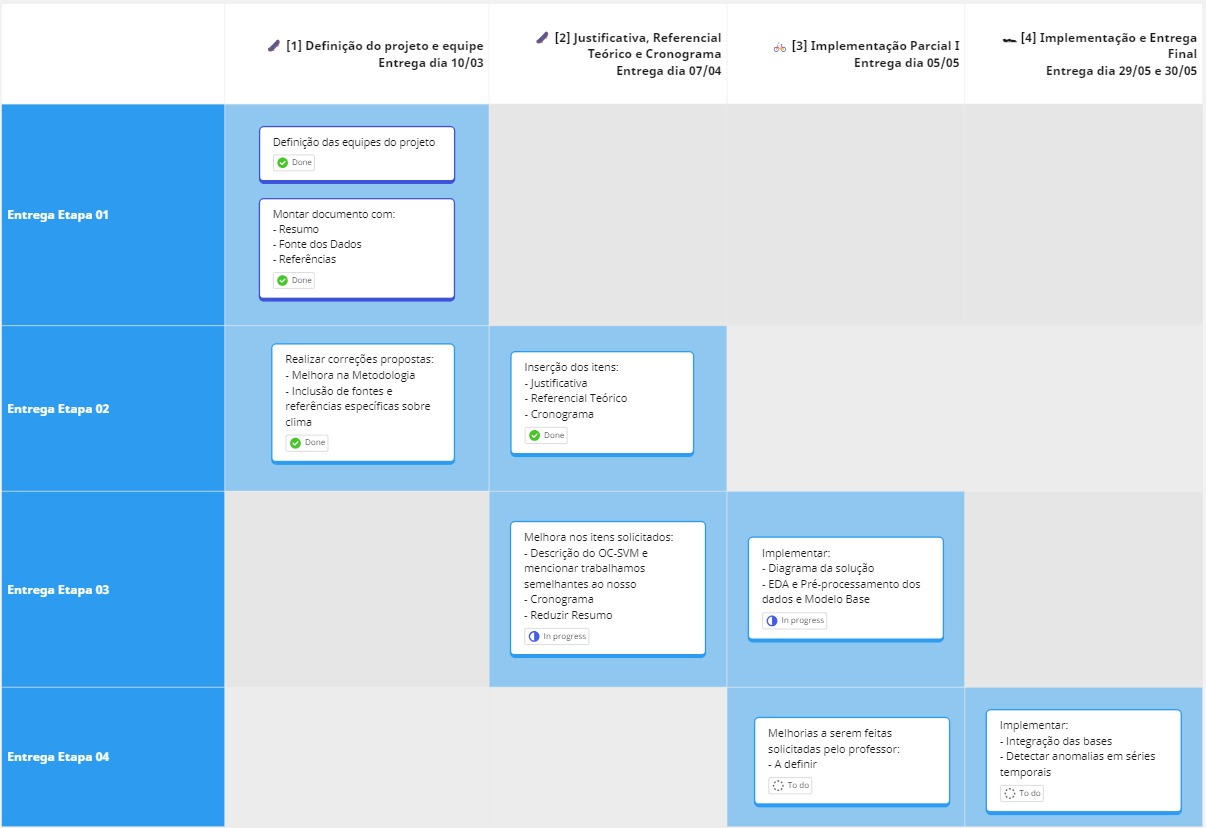**

>


  
  <br>
  <br>
  


# **Referências**

Empresa de Pesquisa Energética. Disponível em: <https://www.epe.gov.br/>. Acesso em: 5 abr. 2024.

Nações Unidas Brasil. Disponível em: <https://brasil.un.org/pt-br/sdgs>. Acesso em: 5 abr. 2024.

ENERGISA. Disponível em: <https://www.grupoenergisa.com.br/institucional>. Acesso em: 5 març. 2024.

PROCON. Disponível em: <https://www.procon.sp.gov.br/espaco-consumidor/#ReclamacoesFundamentadas>. Acesso em: 5 març. 2024.

SANT'ANNA, T.M. Método para detecção e predição de anomalias em séries temporais multivariadas. Dissertação. 2021. Laboratório Nacional de Computação Científica, Rio de Janeiro, RJ. Disponível em: <https://bdtd.ibict.br/vufind/Record/LNCC_5b25ac3a9decfaf629b6f7e0a97f667f>. Acesso em: 5 març. 2024.

ScikitLearn. Disponível em: <https://scikit-learn.org/stable/>.

SOUSA, Alex R S.; SILVA, Cristiane; SILVA, Juliane S F.; et al. Análise de séries temporais. [Digite o Local da Editora]: Grupo A, 2021. E-book. ISBN 9786556902876. Disponível em: https://app.minhabiblioteca.com.br/#/books/9786556902876/. Acesso em: 30 mar. 2024.

BARBOSA, Guilherme Nunes Nasseh. Desafios de segurança e predição de tráfego em centro de dados e redes de próxima geração. Dissertação (mestrado)-Universidade Federal Fluminense, Niterói, 2022.
DOI: http://dx.doi.org/10.22409/PPGEET.2022.m.11059329743.

JIN, B; CHEN, Y; LI, D et al. A one-class support vector machine calibration method for time series change point detection. 2019 IEEE International Conference on Prognostics and Health Management, ICPHM 2019. DOI: 10.1109/ICPHM.2019.8819385.

YINGJIE Tian, MAHBOUBEH Mirzabagheri, SEYED Mojtaba Hosseini Bamakan, HUADONG Wang, QIANG Qu. Ramp loss one-class support vector machine; A robust and effective approach to anomaly detection problems. Neurocomputing, Volume 310, 2018, Pages 223-235. ISSN 0925-2312.
https://doi.org/10.1016/j.neucom.2018.05.027.OC-SVM.



In [ ]:
#@title **Avaliação**
EDA_e_preprocessamento = 6 #@param {type:"slider", min:0, max:10, step:1}

Modelo_base = 5 #@param {type:"slider", min:0, max:10, step:1}

Revisao = 6 #@param {type:"slider", min:0, max:10, step:1}

Apresentacao_geral = 7 #@param {type:"slider", min:0, max:10, step:1}






In [ ]:
#@markdown **Nota Final**
nota = 0.4*EDA_e_preprocessamento + 0.2*Modelo_base + 0.2*Revisao + 0.2*Apresentacao_geral

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_nome = []

for i in range(1,5):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_nome.append(lista[0]);")

alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 6.0



,nome,nota
0,Amanda Noronha Cohen,6.0
1,Kelly Cristina da Silva Pascoalino,6.0
2,Thiago Cerrato Mazza,6.0
3,Viviana Lima Iaconelli,6.0


# Comentários

Achei bastante pouco explorado o EDA. Ausência de gráficos, análises, mas sim, entendo que é uma primeira versão. Mas também não vejo análise de aspectos como sazonalidade, importante para séries temporais.

Não esperava que o modelo, nesta etapa, estivesse completamente documentado e analisado, mas os resultados não parecem bons... não basta "Segundo a documentação da biblioteca Scikit Learn", o modelo tem que fazer algum sentido e neste ponto de primeiro modelo é o que se deve buscar. O modelo não parece capturar a anomalias que pretendiam... será que conseguem ajustar isso até a entrega final?
